In [10]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
def normal_round(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)

## Część teoretyczna

### 1.

In [4]:
def quant(image, kernel_size: int): 
    im = []
    for i in range(0, len(image), kernel_size):
        row = []
        for j in range(0, len(image), kernel_size): 
            pixel = 0
            for k in range(kernel_size):
                for l in range(kernel_size):
                    pixel += image[i+k][j+l]
            row.append(int(round(pixel/(kernel_size*kernel_size))))
        im.append(row)
    return im

#### obraz binarny

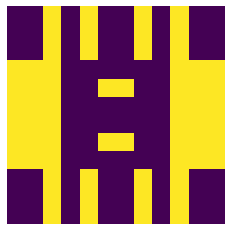

In [233]:
plt.axis("off")
bin1 = np.loadtxt("bin1.txt", int)
imgplot = plt.imshow(bin1)

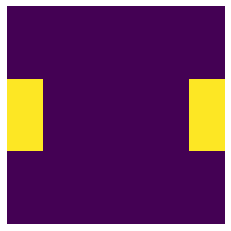

In [232]:
plt.axis("off")
imgplot = plt.imshow(quant(bin1, 2))

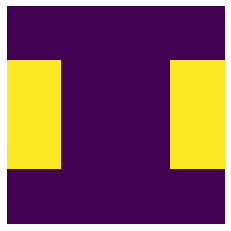

In [231]:
plt.axis("off")
imgplot = plt.imshow(quant(bin1, 3))

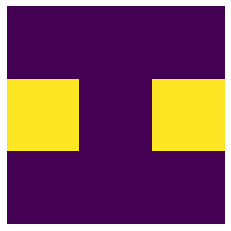

In [230]:
plt.axis("off")
imgplot = plt.imshow(quant(bin1, 4))

#### obraz w skali szarości

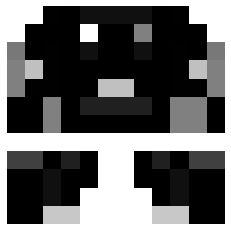

In [229]:
plt.axis("off")
grey1 = np.loadtxt("grey1", int)
imgplot = plt.imshow(grey1, cmap='gray', vmin=0, vmax=255)

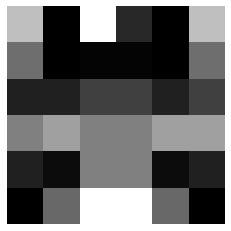

In [228]:
plt.axis("off")
imgplot = plt.imshow(quant(grey1, 2), cmap='gray', vmin=0, vmax=255)

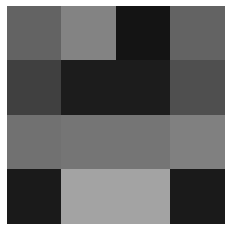

In [227]:
plt.axis("off")
imgplot = plt.imshow(quant(grey1, 3), cmap='gray', vmin=0, vmax=255)

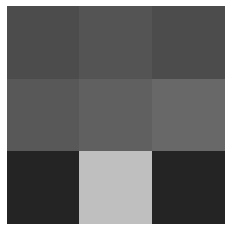

In [226]:
plt.axis("off")
imgplot = plt.imshow(quant(grey1, 4), cmap='gray', vmin=0, vmax=255)

#### obraz w BGR

In [30]:
b1 = np.loadtxt("b1", int)
g1 = np.loadtxt("g1", int)
r1 = np.loadtxt("r1", int)

In [222]:
rgb1 = np.dstack((r1,g1,b1)) 

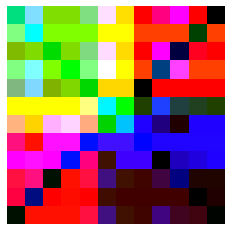

In [57]:
plt.axis("off")
plt.imshow(rgb1)
plt.show()

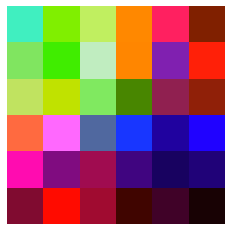

In [184]:
rgb1 = np.dstack((quant(r1, 2),quant(g1, 2),quant(b1, 2))) 
plt.axis("off")
plt.imshow(rgb1)
plt.show()

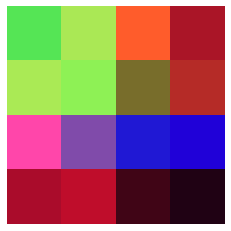

In [185]:
rgb1 = np.dstack((quant(r1, 3),quant(g1, 3),quant(b1, 3))) 
plt.axis("off")
plt.imshow(rgb1)
plt.show()

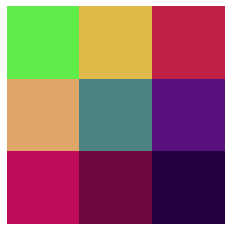

In [183]:
rgb1 = np.dstack((quant(r1, 4),quant(g1, 4),quant(b1, 4))) 
plt.axis("off")
plt.imshow(rgb1)
plt.show()

### 2.

In [216]:
def convert_gray(red, green, blue):
    return np.round(0.3 * blue + 0.59 * green + 0.11 * red).astype(int)

### a)

In [186]:
b2 = np.loadtxt("b2", int)
g2 = np.loadtxt("g2", int)
r2 = np.loadtxt("r2", int)

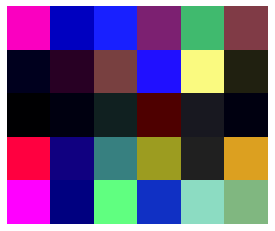

In [188]:
rgb2 = np.dstack((r2, g2, b2))
plt.axis("off")
plt.imshow(rgb2)
plt.show()

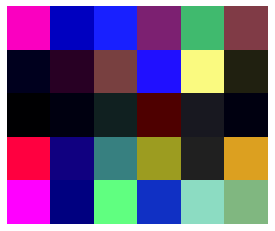

In [195]:
plt.axis("off")
plt.imshow(rgb2, cmap="hsv")
plt.show()

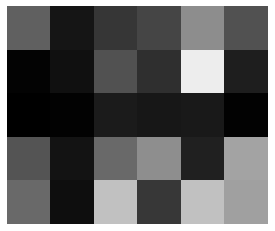

In [234]:
plt.axis("off")
gray2 = convert_gray(b2, g2, r2)
imgplot = plt.imshow(gray2, cmap='gray', vmin=0, vmax=255)

### b)

In [235]:
m2 = np.loadtxt("M2", int)
mrgb = np.dstack((m2, m2, m2))

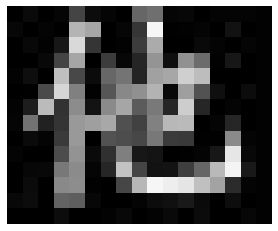

In [236]:
plt.axis("off")
plt.imshow(mrgb)
plt.show()

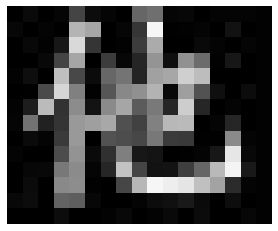

In [238]:
plt.axis("off")
plt.imshow(mrgb, cmap="hsv")
plt.show()

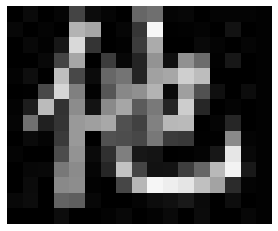

In [237]:
plt.axis("off")
gray2 = convert_gray(m2, m2, m2)
imgplot = plt.imshow(gray2, cmap='gray', vmin=0, vmax=255)

### c)

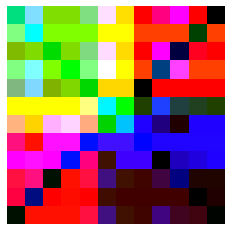

In [223]:
plt.axis("off")
plt.imshow(rgb1, cmap="hsv")
plt.show()

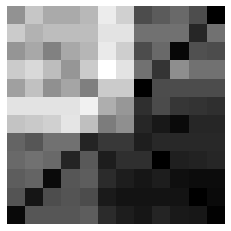

In [225]:
gray3 = convert_gray(b1, g1, r1)
plt.axis("off")
imgplot = plt.imshow(gray3, cmap='gray', vmin=0, vmax=255)

### 3.

In [23]:
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output


In [13]:
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

In [14]:
B = [[0, 2, 4],
    [4, 16, 8],
    [32, 8, 0]]

In [15]:
C = [[3, 5, 8, 16, 8, 5],
     [0, 1, 2, 4, 16, 2],
     [0, 0, 16, 8, 24, 0],
     [4, 16, 55, 7, 3, 1],
     [1, 0, 2, 10, 4, 2]]

In [16]:
mats = [A,B,C]

In [17]:
ka = [[1, 0,-1],
      [0, 0, 0],
      [-1, 0, 1]]

In [18]:
kb = [[0,-1,0],
      [-1, 4, -1],
      [0, -1, 0]]

In [19]:
kc = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

In [20]:
kd = [[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]

In [21]:
kernels = [ka,kb,kc,kd]

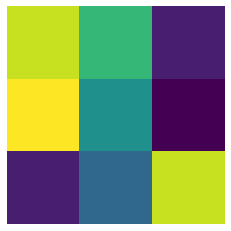

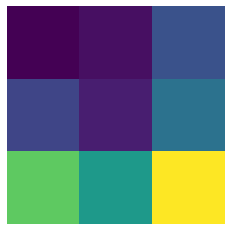

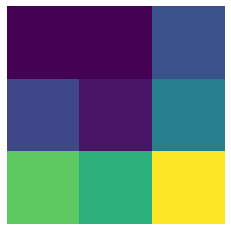

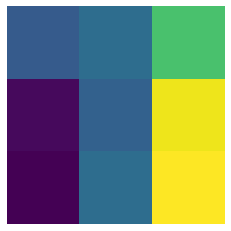

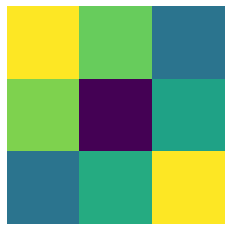

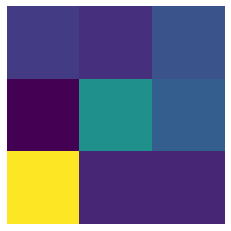

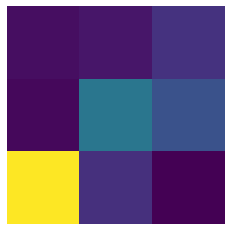

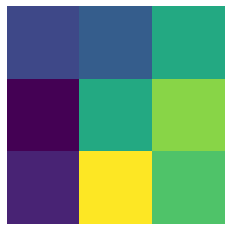

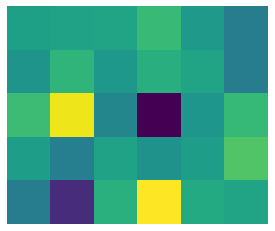

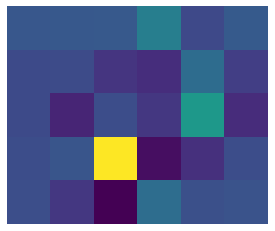

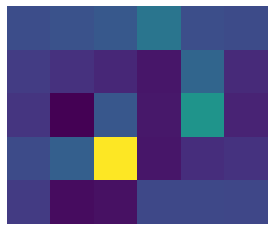

In [29]:
for m in mats: 
    
    for k in kernels:
        fig = plt.figure()
        plt.axis("off")
        imgplot = plt.imshow(convolve2d(np.asarray(m), np.asarray(k)))

## Część praktyczna

### 1.

In [77]:
plt.axis("off")
cabala = cv2.imread("golomb.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(cabala, cmap='gray', vmin=0, vmax=255)
plt.show() 
print(cabala.shape)

(475, 480)


(475, 480, 3)
(475, 480)


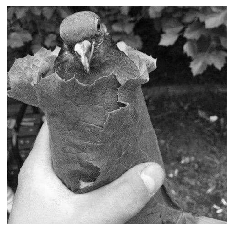

In [80]:
plt.axis("off")
cabala2 = cv2.imread("golomb.jpg")
print(cabala2.shape)
cabala2 = np.mean(cabala2, axis=2)
print(cabala2.shape)

plt.imshow(cabala2, cmap='gray', vmin=0, vmax=255)
plt.show() 

In [79]:
np.linalg.norm(cabala - cabala2, ord=2) 

5039.141426044152

In [61]:
plt.axis("off")
plt.imshow(cv2.imread("golomb.jpg"))